## Thompson Sampling Example ##
### Solving the bandit problem ###
### By: William Tannous, Kx Systems ###

In [5]:
// Simulation Data Load

d:10 / Arms - num_of_advertisements in this example
sim_data:(d#"b";enl",")0:`:Ads_CTR_Optimisation.csv / Simulation Data

In [6]:
//
// @desc Performs Thompson's Sampling Algorithm on a table of simulation rounds.
//
// @param sim_data  {table} Simulation Data.
//
// @return {dictionary} Results of the algorithm's performance on the simulation data:
//                              1. Total Reward from the simulation.
//                              2. Reward for each arm.
//                              3. List of selections made.
//                              4. Number of selections by arm.
//
thompSampAlg:{[sim_data]
    r:.p.import`random; / Import Randomness Python package
    truth:flip value flip sim_data; / Convert table into matrix
    
    //
    // Reset Globals
    //
    totalR::0;
    selections::();
    rewards::count[first truth]#0;
    selByArm::count[first truth]#0;
    fails::count[first truth]#0;

    selectArm:{[r;truth]
        round+:1;
        rSample:r[`:betavariate;<]'[rewards+1;fails+1]; / Take random sample from beta distribution
        sel:rSample?max rSample; / Selected arm
        selByArm[sel]+:1; / Increment selection list
        rewards[sel]+:truth sel; / Increment reward list
        fails[sel]+:not truth sel; / Increment fails list
        totalR+:truth sel; / Increment total reward
        selections,:sel;
        }[r;]each truth;
    `totalReward`rewardsByArm`allSelections`selByArm!(totalR;rewards;selections;selByArm)
    }
res:thompSampAlg sim_data
res

totalReward  | 2605
rewardsByArm | 21 10 5 7 2549 0 3 6 2 2
allSelections| 9 7 0 5 1 6 3 3 4 8 7 2 0 8 8 2 7 8 3 6 3 9 0 9 4 8 5 9 7 1 4 ..
selByArm     | 134 81 56 66 9454 24 43 65 39 38


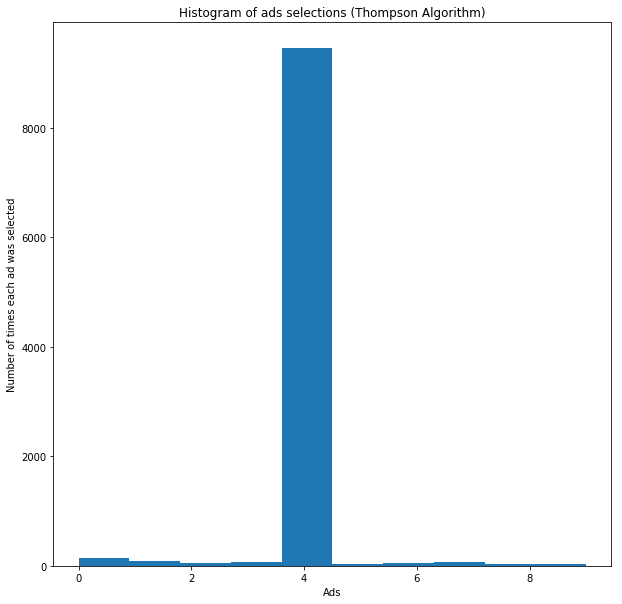

In [7]:
plt:.matplotlib.pyplot[];
plt.figure[`figsize pykw 10 10];
plt.hist(selections);
plt.title"Histogram of ads selections (Thompson Algorithm)";
plt.xlabel"Ads";
plt.ylabel"Number of times each ad was selected";
plt.show[];

### Now we can compare this to random selection ###

In [8]:
randomSel:{[sim]
    truth:flip value flip sim_data;
    rewards::count[first truth]#0;
    selByArm::count[first truth]#0;
    totalR::0;
    selections::();
    round+:1;
    {[truth]sel:rand d; / Selected arm
        selByArm[sel]+:1; / Increment selection list
        rewards[sel]+:truth sel; / Increment reward list
        totalR+:truth sel; / Increment total reward
        selections,:sel;}each truth;
    `totalReward`rewardsByArm`allSelections`selByArm!(totalR;rewards;selections;selByArm)
    }
randomSel sim_data

totalReward  | 1269
rewardsByArm | 152 137 75 139 271 9 130 199 110 47
allSelections| 5 8 3 1 6 4 2 0 1 3 3 3 8 6 9 7 8 1 0 4 6 4 8 1 9 9 5 3 3 8 6 ..
selByArm     | 993 965 983 999 999 973 1064 1011 1057 956


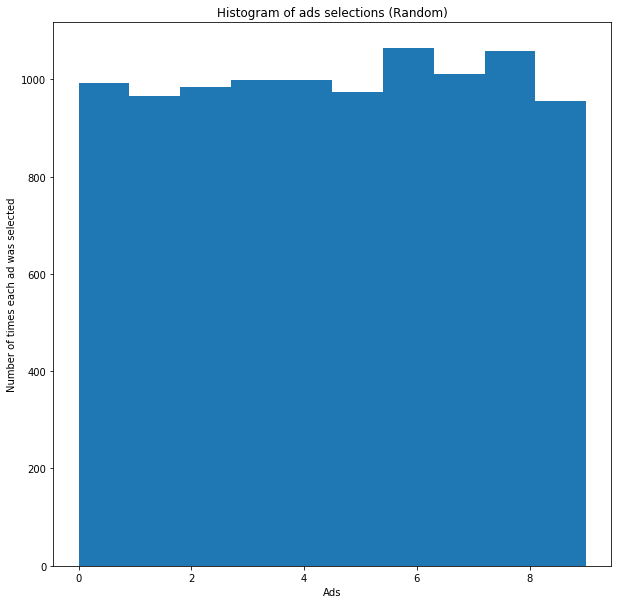

In [9]:
plt:.matplotlib.pyplot[];
plt.figure[`figsize pykw 10 10];
plt.hist(selections);
plt.title"Histogram of ads selections (Random)";
plt.xlabel"Ads";
plt.ylabel"Number of times each ad was selected";
plt.show[];

### The Histogram above shows a nearly uniform selection distribution of the advertisements###
### As expected this resulted in a lower reward than employing the UCB algorithm (2605 vs. 1269)###